Box Plots 

In [1]:
#Importing Libraries 

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#Loading Data 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup 

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [5]:
#Filter for Data Analyst roles in the US 

df_da_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

#drop NaN values from the column 
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])



<Axes: >

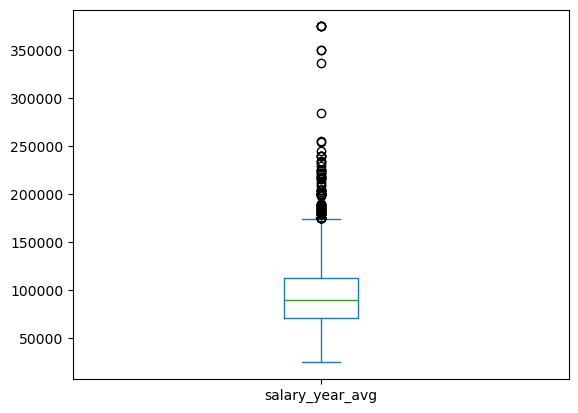

In [ ]:
#plotting the salary_year_avg column into a box plot 

df_da_us['salary_year_avg'].plot(kind='box')

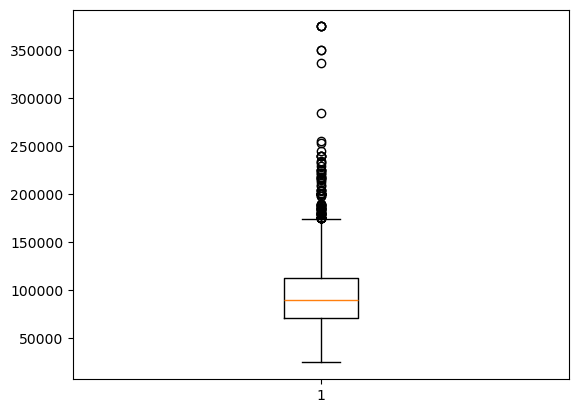

In [9]:
#you can do the same thing using matplotlib 

plt.boxplot(df_da_us['salary_year_avg'])
plt.show()

<Axes: >

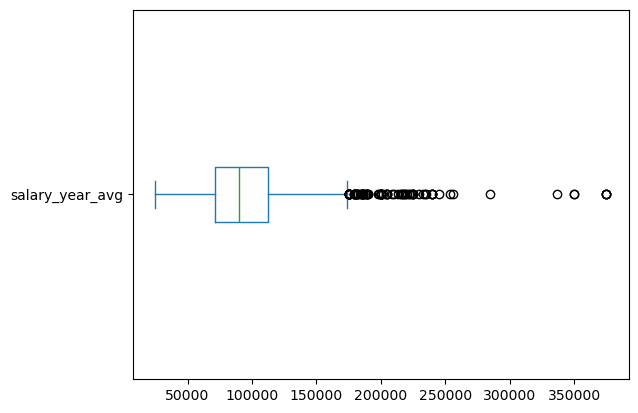

In [10]:
#changing orientation 

df_da_us['salary_year_avg'].plot(kind='box', vert=False)

C:\Users\mitta\AppData\Local\Temp\ipykernel_6776\383439593.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


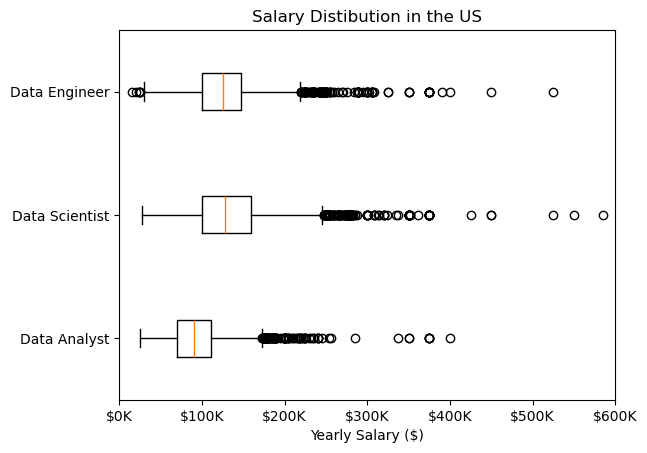

In [21]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_us = df[df['job_title_short'].isin(job_titles)].copy()

df_us= df_us.dropna(subset=['salary_year_avg'])

#using list comprehension to create a series called job_list 
job_list = [df_us[df_us['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

#plotting job_list 
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distibution in the US')
plt.xlabel('Yearly Salary ($)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()